In [1]:
%cd ../
%matplotlib inline

/home/eli/AnacondaProjects/HTFATorch


In [2]:
import logging
import os
import htfa_torch.dtfa as DTFA
import htfa_torch.niidb as niidb
import htfa_torch.utils as utils
import nilearn
import numpy as np

In [3]:
drop_data = '/data/zulqarnain/synthetic_data_multidistz_reconstructed/'
if not os.path.isdir(drop_data):
    os.makedirs(drop_data)

In [4]:
logging.basicConfig(format='%(asctime)s %(message)s', datefmt='%m/%d/%Y %H:%M:%S',
                    level=logging.INFO)

In [5]:
synthetic_db = niidb.FMriActivationsDb('data/synthetic_data_multidistz_norest_wholebrain.db', mask='/data/zulqarnain/wholebrain.nii.gz')
dtfa = DTFA.DeepTFA(synthetic_db.all(), mask='/data/zulqarnain/wholebrain.nii.gz',
                    num_factors=3, embedding_dim=2)

07/29/2019 21:40:20 Loading Nifti image /data/zulqarnain/synthetic_data_multidist_zscored_blocked/nifti_files/subject_10_task_2_stimulus_1.nii with mask /data/zulqarnain/wholebrain.nii.gz (zscore=False, smooth=None)
07/29/2019 21:40:20 Loading Nifti image /data/zulqarnain/synthetic_data_multidist_zscored_blocked/nifti_files/subject_10_task_2_stimulus_2.nii with mask /data/zulqarnain/wholebrain.nii.gz (zscore=False, smooth=None)
07/29/2019 21:40:20 Loading Nifti image /data/zulqarnain/synthetic_data_multidist_zscored_blocked/nifti_files/subject_10_task_2_stimulus_3.nii with mask /data/zulqarnain/wholebrain.nii.gz (zscore=False, smooth=None)
07/29/2019 21:40:20 Loading Nifti image /data/zulqarnain/synthetic_data_multidist_zscored_blocked/nifti_files/subject_10_task_2_stimulus_4.nii with mask /data/zulqarnain/wholebrain.nii.gz (zscore=False, smooth=None)
07/29/2019 21:40:20 Loading Nifti image /data/zulqarnain/synthetic_data_multidist_zscored_blocked/nifti_files/subject_10_task_2_stimulus

In [6]:
dtfa.load_state('data/synthetic_no_noise_k3_n1000_05212019_145800')

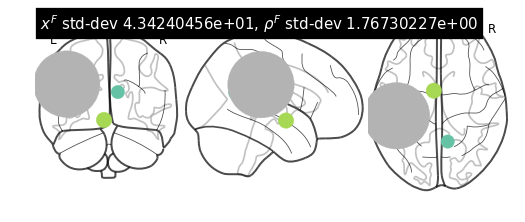

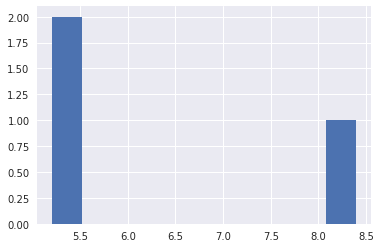

(<nilearn.plotting.displays.OrthoProjector at 0x7fbebc11dc88>,
 tensor([[ 10.0646, -55.7315,  18.3961],
         [ -4.5174,  -2.1897, -10.9688],
         [-43.7759, -28.5721,  26.8155]]),
 tensor([5.2037, 5.4844, 8.3955]))

In [7]:
dtfa.visualize_factor_embedding(filename='factor_embedding_init')

In [8]:
def task_rest_labeler(task):
    if 'rest' in str(task):
        return 'Rest'
    elif 'baseline' in str(task):
        return 'Baseline'
    else:
        return 'Task'

In [9]:
def subject_labeler(subject):
    subject_blocks = [block for block in dtfa._blocks if block.subject == subject]
    block = subject_blocks[0]
    if block.individual_differences['condition'] == 0:
        return 'Group 1'
    elif block.individual_differences['condition'] == 1:
        return 'Group 2'
    else:
        return 'Group 3'

/home/eli/anaconda3/envs/HTFATorch/lib/python3.6/site-packages/matplotlib/figure.py:418: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


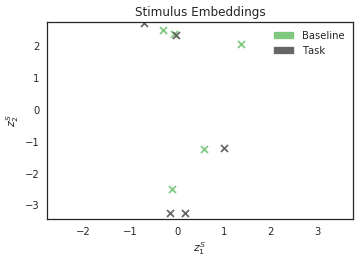

In [10]:
dtfa.scatter_task_embedding(labeler=task_rest_labeler, filename='stimuli_embedding_means', plot_ellipse=False)

/home/eli/anaconda3/envs/HTFATorch/lib/python3.6/site-packages/matplotlib/figure.py:418: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


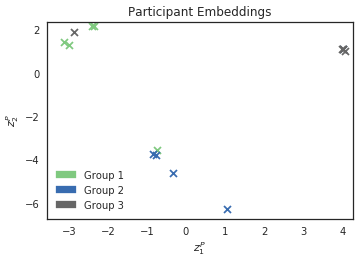

In [11]:
dtfa.scatter_subject_embedding(labeler=subject_labeler, filename='participant_embedding_means', plot_ellipse=False)

/home/eli/anaconda3/envs/HTFATorch/lib/python3.6/site-packages/matplotlib/figure.py:418: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


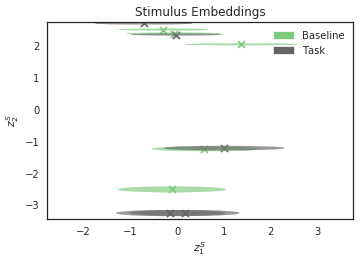

In [12]:
dtfa.scatter_task_embedding(labeler=task_rest_labeler, filename='stimuli_embedding_cov', plot_ellipse=True)

/home/eli/anaconda3/envs/HTFATorch/lib/python3.6/site-packages/matplotlib/figure.py:418: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


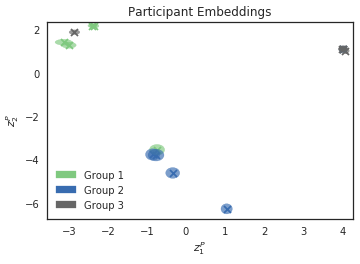

In [13]:
dtfa.scatter_subject_embedding(labeler=subject_labeler, filename='participant_embedding_cov', plot_ellipse=True)

In [14]:
def synthetic_multidist_labeler(block):
    subject = subject_labeler(block.subject)
    task = task_rest_labeler(block.task)
    return subject + ', ' + task + ' stimulus'

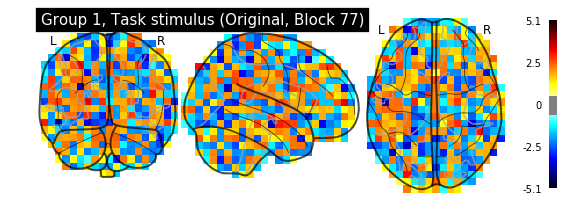

07/29/2019 21:40:52 Reconstruction Error (Frobenius Norm): 3.70024780e+02 out of 3.24001465e+02


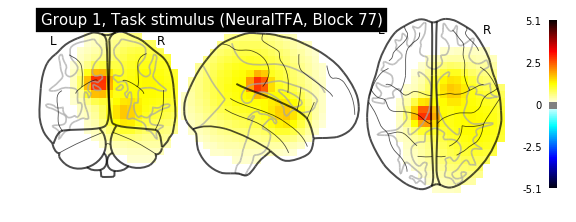

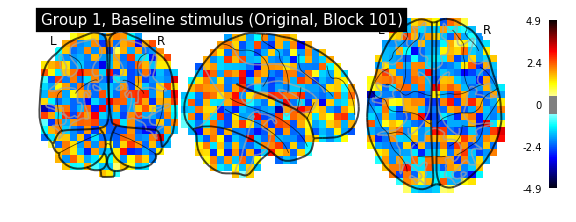

07/29/2019 21:40:55 Reconstruction Error (Frobenius Norm): 3.22023712e+02 out of 3.19129028e+02


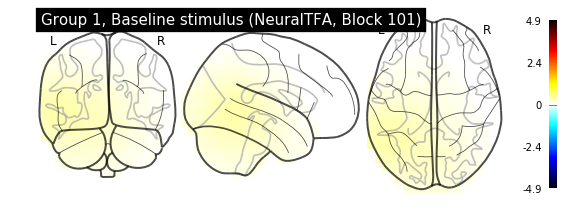

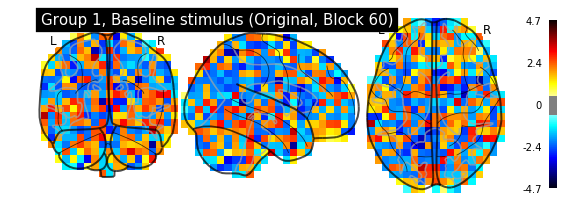

07/29/2019 21:40:58 Reconstruction Error (Frobenius Norm): 3.21305023e+02 out of 3.18921997e+02


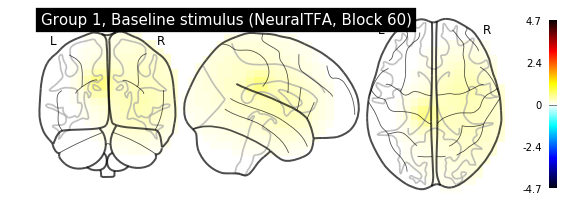

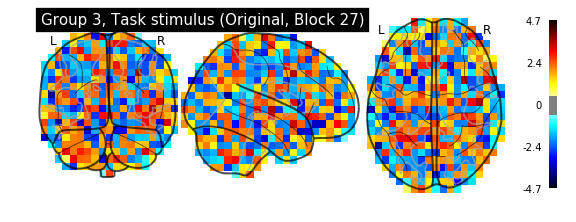

07/29/2019 21:41:01 Reconstruction Error (Frobenius Norm): 3.67559082e+02 out of 3.23181549e+02


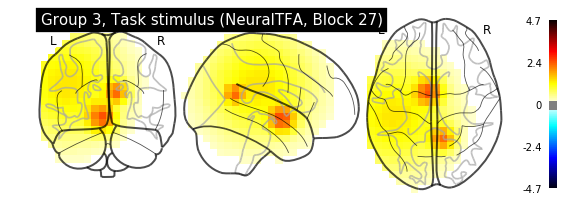

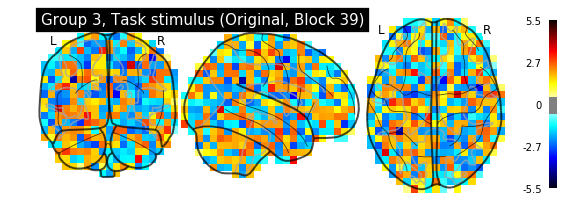

07/29/2019 21:41:04 Reconstruction Error (Frobenius Norm): 3.63049408e+02 out of 3.23351410e+02


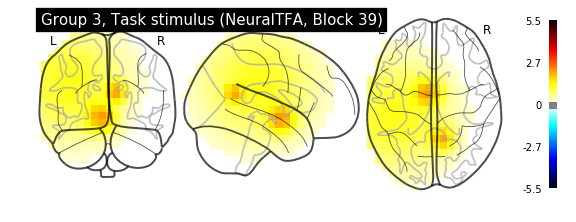

In [15]:
for b in np.random.choice(range(dtfa.num_blocks), 5):
    dtfa.plot_original_brain(b, labeler=synthetic_multidist_labeler)
    dtfa.plot_reconstruction(b, labeler=synthetic_multidist_labeler)

In [16]:
dtfa.average_reconstruction_error(weighted=False)

07/29/2019 21:41:06 Average reconstruction error (MSE): 3.52406224e+02 +/- 3.76372710e+01
07/29/2019 21:41:06 Average data norm (Euclidean): 3.21228888e+02 +/- 2.61662119e+00
07/29/2019 21:41:06 Percent average reconstruction error: 109.634912 +/- 1.09707005e+01


(array([318.72293091, 318.27844238, 317.9083252 , 320.0118103 ,
        319.17474365, 347.32141113, 354.71508789, 359.88833618,
        356.45574951, 353.07305908, 320.70907593, 320.03338623,
        319.07324219, 319.78686523, 320.24313354, 353.68295288,
        363.15765381, 367.8293457 , 366.00579834, 361.82272339,
        321.08013916, 319.51696777, 318.78283691, 319.51550293,
        319.23324585, 355.11825562, 361.10116577, 367.55908203,
        364.42471313, 361.78091431, 320.09716797, 319.7098999 ,
        318.57382202, 320.81005859, 319.46343994, 358.82315063,
        364.76647949, 370.56951904, 368.44448853, 363.04940796,
        319.59777832, 318.3508606 , 320.30303955, 320.15161133,
        320.58203125, 354.86148071, 361.21716309, 369.15371704,
        364.82772827, 360.70758057, 322.39825439, 319.69122314,
        318.359375  , 321.44558716, 320.11096191, 380.65298462,
        391.33560181, 402.46450806, 396.88671875, 390.92425537,
        321.30502319, 319.73855591, 320.

In [17]:
dtfa.average_reconstruction_error()

07/29/2019 21:41:07 Average reconstruction error (MSE): 1.10559069e+00
07/29/2019 21:41:07 Average data norm (Euclidean): 1.00211359e+00
07/29/2019 21:41:07 Percent average reconstruction error: 1.537197


(1.1055906933415462, 1.0021135872234135, 0.01537197498185814)